In [1]:
#Import Library
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pathlib import Path

In [2]:
base_data_dir = Path('../../artifacts\datasets/dogSkinDiseasev2')

train_dir = Path('../../artifacts/datasets/dogSkinDiseasev2/train')
if os.path.exists(train_dir):
    print("Available directories:", os.listdir(train_dir))
else:
    print(f"Directory {train_dir} does not exist.")

val_dir = Path('../../artifacts/datasets/dogSkinDiseasev2/validation')
if os.path.exists(val_dir):
    print("Available directories:", os.listdir(val_dir))
else:
    print(f"Directory {val_dir} does not exist.")

test_dir = Path('../../artifacts/datasets/dogSkinDiseasev2/test')
if os.path.exists(test_dir):
    print("Available directories:", os.listdir(test_dir))
else:
    print(f"Directory {test_dir} does not exist.")

class_names_dataset = ['Bacterial_dermatosis', 'flea_allergy', 'Fungal_infections', 'Healthy', 'hotspot', 'Hypersensitivity_allergic_dermatosis', 'mange', 'ringworm']

Available directories: ['Bacterial_dermatosis', 'flea_allergy', 'Fungal_infections', 'Healthy', 'hotspot', 'Hypersensitivity_allergic_dermatosis', 'mange', 'ringworm']
Available directories: ['Bacterial_dermatosis', 'flea_allergy', 'Fungal_infections', 'Healthy', 'hotspot', 'Hypersensitivity_allergic_dermatosis', 'mange', 'ringworm']
Available directories: ['Bacterial_dermatosis', 'flea_allergy', 'Fungal_infections', 'Healthy', 'hotspot', 'Hypersensitivity_allergic_dermatosis', 'mange', 'ringworm']


In [3]:
# training_set folder
for class_name in class_names_dataset:
    class_path = os.path.join(train_dir, class_name)
    if os.path.exists(class_path):
        print(f"There are {len(os.listdir(class_path))} train set images of {class_name}.")
    else:
        print(f"Directory for {class_name} not found in train set.")

# validation_set folder
print("\n")
for class_name in class_names_dataset:
    class_path = os.path.join(val_dir, class_name)
    if os.path.exists(class_path):
        print(f"There are {len(os.listdir(class_path))} validation set images of {class_name}.")
    else:
        print(f"Directory for {class_name} not found in validation set.")

# test_set folder
print("\n")
for class_name in class_names_dataset:
    class_path = os.path.join(test_dir, class_name)
    if os.path.exists(class_path):
        print(f"There are {len(os.listdir(class_path))} test set images of {class_name}.")
    else:
        print(f"Directory for {class_name} not found in test set.")

There are 57 train set images of Bacterial_dermatosis.
There are 76 train set images of flea_allergy.
There are 97 train set images of Fungal_infections.
There are 79 train set images of Healthy.
There are 96 train set images of hotspot.
There are 50 train set images of Hypersensitivity_allergic_dermatosis.
There are 63 train set images of mange.
There are 138 train set images of ringworm.


There are 20 validation set images of Bacterial_dermatosis.
There are 20 validation set images of flea_allergy.
There are 20 validation set images of Fungal_infections.
There are 20 validation set images of Healthy.
There are 20 validation set images of hotspot.
There are 20 validation set images of Hypersensitivity_allergic_dermatosis.
There are 20 validation set images of mange.
There are 20 validation set images of ringworm.


There are 20 test set images of Bacterial_dermatosis.
There are 20 test set images of flea_allergy.
There are 20 test set images of Fungal_infections.
There are 20 test se

# Overlapping Diseases:
## Flea_allergy:
This can fall under Hypersensitivity_allergic_dermatosis since flea allergy dermatitis (FAD) is a common allergic response caused by flea saliva.

## Ringworm:
Although listed separately, this is a specific type of fungal infection. It might overlap with Fungal_infections.

## Hotspot (acute moist dermatitis):
These are localized skin infections caused by constant licking, scratching, or biting, often secondary to flea allergies or other irritants. It may overlap with Bacterial_dermatosis if bacteria invade the lesion.

## Mange:
Caused by mites (Demodex or Sarcoptes). It’s parasitic and does not overlap with bacterial, fungal, or allergic conditions.

# Updated Class Names Dataset with Combined Categories:
1. Bacterial_dermatosis: (Unchanged)
2. Flea_allergy_and_Hypersensitivity: Combines flea_allergy and Hypersensitivity_allergic_dermatosis since flea allergy is a subset of hypersensitivity.
3. Fungal_infections_and_Ringworm: Combines Fungal_infections and ringworm as ringworm is a type of fungal infection.
4. Healthy: (Unchanged)
5. Hotspot: Kept distinct but acknowledges overlap with Bacterial_dermatosis in cases of bacterial invasion.
6. Mange: (Unchanged)

In [ ]:
# Base directory
base_data_dir = Path('../../artifacts/datasets/dogSkinDiseasev2')

# Directories for training, validation, and testing
train_dir = base_data_dir / 'train'
val_dir = base_data_dir / 'validation'
test_dir = base_data_dir / 'test'

# Check if directories exist
for dir_name, dir_path in [("train", train_dir), ("validation", val_dir), ("test", test_dir)]:
    if os.path.exists(dir_path):
        print(f"Available directories in {dir_name}:", os.listdir(dir_path))
    else:
        print(f"Directory {dir_path} does not exist.")

# Updated class names dataset
class_names_dataset = [
    'Bacterial_dermatosis',
    'Flea_allergy_and_Hypersensitivity',
    'Fungal_infections_and_Ringworm',
    'Healthy',
    'Hotspot',
    'Mange'
]

# Example usage of directories with updated class names
training_dirs = {class_name: os.path.join(train_dir, class_name) for class_name in class_names_dataset}
validation_dirs = {class_name: os.path.join(val_dir, class_name) for class_name in class_names_dataset}
testing_dirs = {class_name: os.path.join(test_dir, class_name) for class_name in class_names_dataset}

# Print directories for sanity check
for class_name in class_names_dataset:
    print(f"Training directory for {class_name}: {training_dirs[class_name]}")
    print(f"Validation directory for {class_name}: {validation_dirs[class_name]}")
    print(f"Testing directory for {class_name}: {testing_dirs[class_name]}")

In [4]:
class_names_dataset

['Bacterial_dermatosis',
 'flea_allergy',
 'Fungal_infections',
 'Healthy',
 'hotspot',
 'Hypersensitivity_allergic_dermatosis',
 'mange',
 'ringworm']

In [5]:
TRAINING_BACTERIAL_DIR = os.path.join(train_dir, class_names_dataset[0])
VALIDATION_BACTERIAL_DIR = os.path.join(val_dir, class_names_dataset[0])
TESTING_BACTERIAL_DIR = os.path.join(test_dir, class_names_dataset[0])

TRAINING_FLEA_DIR = os.path.join(train_dir, class_names_dataset[1])
VALIDATION_FLEA_DIR = os.path.join(val_dir, class_names_dataset[1])
TEST_FLEA_DIR = os.path.join(test_dir, class_names_dataset[1])

TRAINING_FUNGAL_DIR = os.path.join(train_dir, class_names_dataset[2])
VALIDATION_FUNGAL_DIR = os.path.join(val_dir, class_names_dataset[2])
TESTING_FUNGAL_DIR = os.path.join(test_dir, class_names_dataset[2])

TRAINING_HEALTHY_DIR = os.path.join(train_dir, class_names_dataset[3])
VALIDATION_HEALTHY_DIR = os.path.join(val_dir, class_names_dataset[3])
TESTING_HEALTHY_DIR = os.path.join(test_dir, class_names_dataset[3])

TRAINING_HOTSPOT_DIR = os.path.join(train_dir, class_names_dataset[4])
VALIDATION_HOTSPOT_DIR = os.path.join(val_dir, class_names_dataset[4])
TESTING_HOTSPOT_DIR = os.path.join(test_dir, class_names_dataset[4])

TRAINING_ALLERGIC_DIR = os.path.join(train_dir, class_names_dataset[5])
VALIDATION_ALLERGIC_DIR = os.path.join(val_dir, class_names_dataset[5])
TESTING_ALLERGIC_DIR = os.path.join(test_dir, class_names_dataset[5])

TRAINING_MANGE_DIR = os.path.join(train_dir, class_names_dataset[6])
VALIDATION_MANGE_DIR = os.path.join(val_dir, class_names_dataset[6])
TESTING_MANGE_DIR = os.path.join(test_dir, class_names_dataset[6])

TRAINING_RINGWORM_DIR = os.path.join(train_dir, class_names_dataset[7])
VALIDATION_RINGWORM_DIR = os.path.join(val_dir, class_names_dataset[7])
TESTING_RINGWORM_DIR = os.path.join(test_dir, class_names_dataset[7])

In [6]:
TRAINING_DIR = train_dir
VALIDATION_DIR = val_dir
TEST_DIR = test_dir

In [7]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.,
    fill_mode='nearest',
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
)

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=16,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

###Train Val Generator

In [8]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 654 images belonging to 8 classes.
Found 159 images belonging to 8 classes.


###Show Sample Images

In [9]:
#create function to show image examples
def show_image_samples(gen):
  train_dict = train_generator.class_indices
  
  classes = list(train_dict.keys())
  images, labels = next(gen) #get a sample batch from generator
  
  plt.figure(figsize=(20,20))
  
  length = len(labels)
  if length < 10:
    r = length
  else:
    r = 10
  
  for i in range(r):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='black', fontsize=18)
    plt.axis('off')
  plt.show()

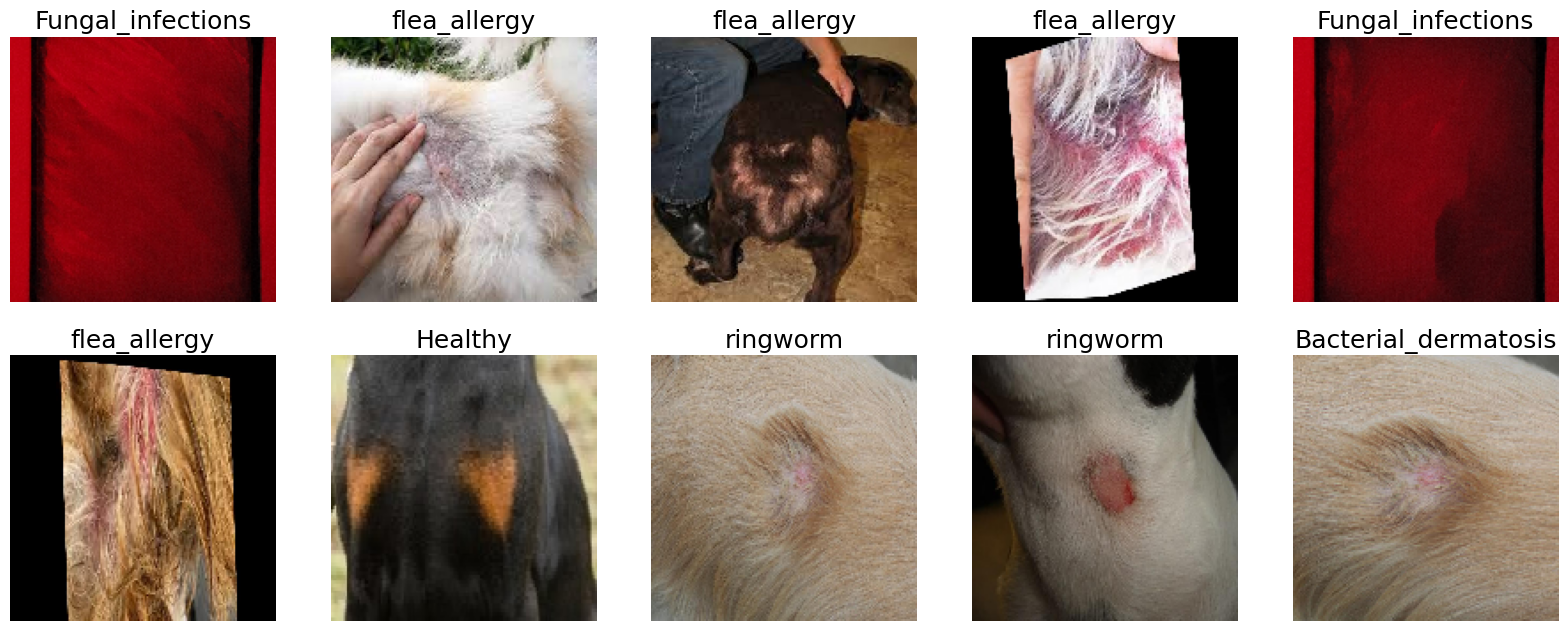

In [10]:
show_image_samples(train_generator)

#Modelling CNN (simple)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [12]:
resize_and_rescale = Sequential([
    Resizing(150, 150),
    Rescaling(1.0 / 255.)
])

In [13]:
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])

In [30]:
model = Sequential([
  # resize_and_rescale,
  # data_augmentation,
        
  Conv2D(32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D((2,2)),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D((2,2)),

  Flatten(),

  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(32, activation='relu'),
  Dropout(0.2),
  Dense(16, activation='relu'),
  Dropout(0.2),
  Dense(8, activation='softmax')
])

model.compile(
  optimizer=Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,368 (583.47 KB)

 Trainable params: 149,368 (583.47 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Define the function callback

import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.00001,
    verbose=1,
)

# Model Checkpoint
checkpoint_path = '../../artifacts/model_checkpoints/SkinDisease.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    verbose = 1,
    callbacks = [early_stopping, checkpoint]
)

#plot and evaluation

In [17]:
# Obtain training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Draw loss plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()
print()

# Draw accuracy plot
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

NameError: name 'history' is not defined

In [31]:
from tensorflow.keras.models import load_model

model = load_model('SkinDisease.keras')

In [32]:
test_datagen = ImageDataGenerator(rescale = 1.0 / 255. )

# pass in the appropriate arguments to the flow_from_directory method
test_set_2 = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=16,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

Found 159 images belonging to 8 classes.


In [33]:
Y_pred_2 = model.predict(test_set_2)
y_pred_2 = np.argmax(Y_pred_2, axis=1)

c:\Users\Hp\Documents\GitHub\animal-disease-recognition\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step


In [34]:
print(classification_report(test_set_2.classes, y_pred_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.15      0.20      0.17        20
           2       0.15      0.45      0.23        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.14      0.50      0.22        20

    accuracy                           0.14       159
   macro avg       0.06      0.14      0.08       159
weighted avg       0.06      0.14      0.08       159



c:\Users\Hp\Documents\GitHub\animal-disease-recognition\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\Documents\GitHub\animal-disease-recognition\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hp\Documents\GitHub\animal-disease-recognition\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

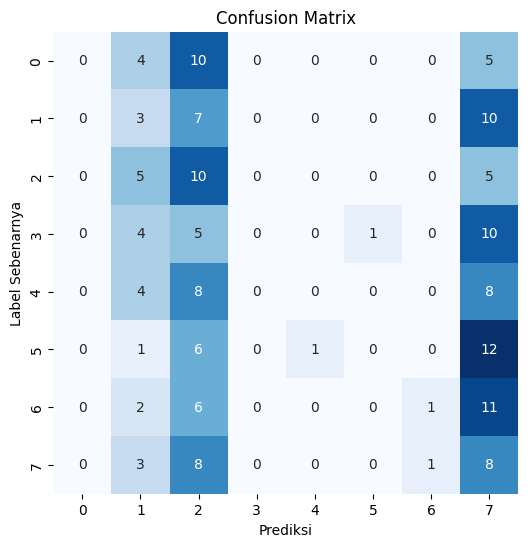

In [23]:
# Misalkan test_set_2.classes adalah label yang sebenarnya dan y_pred_2 adalah label prediksi
y_true = test_set_2.classes  # Label yang sebenarnya
y_pred = y_pred_2  # Label prediksi

# Menghitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Menampilkan confusion matrix dalam bentuk heatmap
class_names = ['0', '1', '2', '3', '4', '5', '6', '7']  # Nama kelas (sesuaikan dengan kelas Anda)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi')
plt.ylabel('Label Sebenarnya')
plt.title('Confusion Matrix')
plt.show()

###Predict New Images


In [26]:
class_names_dataset

['Bacterial_dermatosis',
 'flea_allergy',
 'Fungal_infections',
 'Healthy',
 'hotspot',
 'Hypersensitivity_allergic_dermatosis',
 'mange',
 'ringworm']

In [27]:
def predict_image(image_upload, model = model):
    im = image_upload
    im_array = np.asarray(im)
    im_array = im_array*(1.0/225.)
    im_input = tf.reshape(im_array, shape = [1, 150, 150, 3])

    predict_array = model.predict(im_input)[0]

    import pandas as pd
    df = pd.DataFrame(predict_array)
    df = df.rename({0:'Probability'}, axis = 'columns')
    prod = class_names_dataset
    df['Animal'] = prod
    df = df[['Animal', 'Probability']]

    predict_label = np.argmax(model.predict(im_input))

    if predict_label == 0:
        predict_product = 'Bacterial_dermatosis'
    elif predict_label == 1:
        predict_product = 'flea_allergy'
    elif predict_label == 2:
        predict_product = 'Fungal_infections'
    elif predict_label == 3:
        predict_product = 'Healthy'
    elif predict_label == 4:
        predict_product = 'hotspot'
    elif predict_label == 5:
        predict_product = 'Hypersensitivity_allergic_dermatosis'
    elif predict_label == 6:
        predict_product = 'mange'
    else:
        predict_product = 'ringworm'

    return predict_product, df

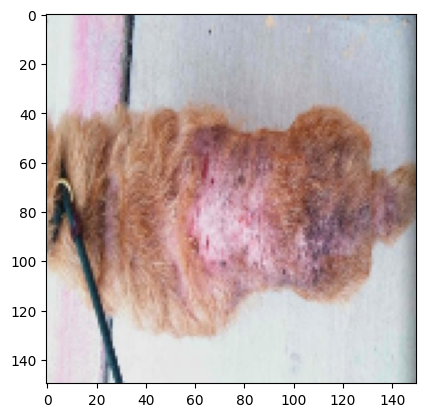

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

The image is detected as ringworm


                                 Animal  Probability
0                  Bacterial_dermatosis     0.110827
1                          flea_allergy     0.138052
2                     Fungal_infections     0.099608
3                               Healthy     0.083248
4                               hotspot     0.134931
5  Hypersensitivity_allergic_dermatosis     0.149337
6                                 mange     0.092102
7                              ringworm     0.191895


In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import os

# Prompt the user to input the image path
img_path = input("Please enter the path to the image file: ")

# Check if the file exists
if os.path.exists(img_path):
    # Load the image and resize it to 150x150
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))

    # Display the image
    plt.imshow(img)
    plt.show()

    # Convert the image to a numpy array and preprocess it for prediction
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)  # Expand dimensions to match model input shape
    img = np.vstack([x])

    # Assuming 'predict_image' is a function that returns the label and a DataFrame with results
    label, df = predict_image(img)

    # Print the label and DataFrame
    print("\nThe image is detected as " + label)
    print('\n')
    print(df)
else:
    print("The file does not exist. Please check the path and try again.")